# Projects 1

Xiao Wei

Hi Xiao,

I think you’ve done a nice job with the coding aspect of these reports.
Everything you do is straightforward enough that I can clearly follow
it. (For students who are less skilled programmers, they sometimes make
very convoluted code which is really hard for me to understand.)

However, I’d like to see much more explanation of what you’re doing and
why, from a mathematical perspective. For instance, in the diffusion
problem, you could start with a section describing the problem setup and
what you are trying to find. Then each time you put a bit of code, you
should explain what that code is doing, perhaps giving (in Markdown) the
formula that you are implementing.

It takes a little while to get used to writing in Markdown when you are
used to just commenting within your code; you can be more vebose and
write in full sentences, use Latex expressions, etc.

Then, when you make plots, they should be clearly labeled and you should
explain what you are seeing in the plot.

Finally, I’d like to see you interacting a bit with the ideas that
explain why you get the results you get. For instance, in the Markov
Chain problem, you could explain how you can tell from the intial
matrices which companies are likely to be more profitable in the long
run.

(Regarding the Markov Chain problem – you state that the system will
always converge to the same stationary state, which I think is true but
in this report I’d like to see you try it by using a few different
initial states. Or do a mathematical proof if you have a good idea of
how to do that!)

I’m going to give you a grade of R for each of these projects; I hope
you will be able to revise and resubmit them, because the underlying
work here is quite good.

# *Diffusion*

In [2]:
import sympy as sym
import numpy as np
import pandas as pd
sb = sym.Symbol

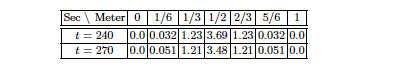

In [3]:
N=7
M = sym.zeros(N)
for i in range(N):
  if (i>0):
      M[i-1,i]=1
  M[i,i]=-2
  if (i<N-1):
      M[i+1,i]=1
  # M[0, i] = 0
  # M[6, i] = 0
#   M[i, 0] = 0
#   M[i, 6] = 0
# M[5, 6] = 0
M

In [4]:
t270 = sym.Matrix([0.0, 0.051, 1.21, 3.48, 1.21, 0.051, 0.0])
# t270 = sym.Matrix([0.051, 1.21, 3.48, 1.21, 0.051])

In [5]:
t240 = sym.Matrix([0.0, 0.032, 1.23, 3.69, 1.23, 0.032, 0.0])

Going forward from 240 to 270

In [6]:
Dh2 = 0.00004 * 36

current = t240
for step in range(240, 271):
    next_step = current + M*current * Dh2
    if step % 10 == 0:
        print(step, current)
        print('\n')
    current = next_step

240 Matrix([[0], [0.0320000000000000], [1.23000000000000], [3.69000000000000], [1.23000000000000], [0.0320000000000000], [0]])


250 Matrix([[0.000562471243392380], [0.0486924553785851], [1.24759546552771], [3.62029245984376], [1.24759546552771], [0.0486924553785851], [0.000562471243392380]])


260 Matrix([[0.00134480689310895], [0.0651618382102242], [1.26395165777253], [3.55305081122375], [1.26395165777253], [0.0651618382102242], [0.00134480689310895]])


270 Matrix([[0.00233753410690556], [0.0814003695987503], [1.27913496114619], [3.48817057984740], [1.27913496114619], [0.0814003695987503], [0.00233753410690556]])



Backwards from 270 to 240

In [7]:
current.shape

(7, 1)

In [8]:
Dh2 = 0.00004 * 36

current = t270
for step in range(270, -1, -1):
    prev_step = (sym.eye(current.shape[0]) + M* Dh2).inv()*current 
    if step % 40 == 0:
        print(step, current)
        print('\n')
    current = sym.Matrix(np.maximum(prev_step, 0))
print(step, current)
init_state = current

240 Matrix([[0], [0.00212689488945927], [1.15621985395050], [3.68754809461451], [1.15621985395048], [0.00212689488945964], [0]])


200 Matrix([[9.47143103797723e-5], [0], [1.06279149507993], [4.00254036435968], [1.06279149507989], [0], [9.47143103797697e-5]])


160 Matrix([[0.000194835210686209], [0], [0.937128531983600], [4.36938971176471], [0.937128531983537], [0], [0.000194835210686203]])


120 Matrix([[0.000294410849364334], [0], [0.771792042493187], [4.79882186271244], [0.771792042493099], [0], [0.000294410849364323]])


80 Matrix([[0.000389481701770366], [0], [0.557712169649991], [5.30388057840637], [0.557712169649879], [0], [0.000389481701770348]])


40 Matrix([[0.000474717247747708], [0], [0.283827585787304], [5.90043223273764], [0.283827585787171], [0], [0.000474717247747682]])


0 Matrix([[0.000543077482862398], [8.59904987581519e-5], [0], [6.60726130357147], [0], [8.59904987583709e-5], [0.000543077482862360]])


0 Matrix([[0.000544502698002186], [9.92726600399977e-5], [0], [

In [9]:
import warnings
warnings.filterwarnings("ignore")
current = init_state
plot_df = pd.DataFrame([], columns=['0', '1/6', '1/3', '1/2'], dtype=np.float64)
for step in range(0, 301):
    plot_df.loc[step] = current[:4]
    next_step = current + M*current * Dh2
    if step==0 or step ==210 or step == 300:
        print(step, current)
        print('\n')
    current = next_step
plot_df.loc[step] = current[:4]

0 Matrix([[0.000544502698002186], [9.92726600399977e-5], [0], [6.62637281796703], [0], [9.92726600402174e-5], [0.000544502698002148]])


210 Matrix([[0.0171961512440258], [0.170658419488325], [1.14714251754697], [3.95457410693089], [1.14714251754697], [0.170658419488326], [0.0171961512440258]])


300 Matrix([[0.0390928199813232], [0.277467835539847], [1.32429430615571], [3.33577189136941], [1.32429430615571], [0.277467835539847], [0.0390928199813232]])



In [10]:
plot_df = plot_df.astype(np.float_)

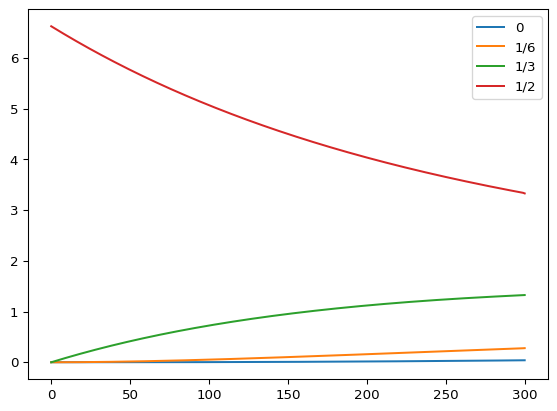

In [11]:
plot_df.plot(kind='line')

It is expected that the center curve looks like an logarithmic decay,
the 1/3 curve looks like a logarithmic increase which I suppose will
decrease at the point. Using Linear Algebra does seem like a much easier
approach than the actual Physics of computing the diffusion constant as
well as the intial concentration.

# *Markov*

In [12]:
import sympy as sym
sb = sym.Symbol
import pandas as pd

In [13]:
M = sym.Matrix([[.5, .2, .3],[.2, .6, .1], [.3, .2, .6]])
M

3 years later

In [14]:
M**3 * sym.Matrix([0.33333, 0.33333, 0.33333])

first campaign

In [15]:
Mc1 = sym.Matrix([[.5, .32, .3],[.2, .48, .1], [.3, .2, .6]])
Mc1

In [16]:
Mc1**50 * sym.Matrix([0.33333, 0.33333, 0.33333])

In [17]:
Mc1**50 * sym.Matrix([0, 1, 0])

#### *second campaign below*

In [18]:
Mc2 = sym.Matrix([[.5, .32, .3+.6*.2],[.2, .48, .1], [.3, .2, .6*.8]])
Mc2

In [19]:
Mc2**50 * sym.Matrix([0.33333, 0.33333, 0.33333])

In [20]:
Mc2**50 * sym.Matrix([0, 1, 0])

### *Report*

It is better to run campaign 2 as the steady state vector for campaign 2
is 43% vs 38% for campaign 1. It does not matter what the starting state
is the end state after many iterations would be the same. As such the
second campaign has insurance company A with a higher market share.

Below is the chart for the net gain our company A gains from either
company B for marketing campaign 1 or company C for marketing campaign 2
for each subsequent iteration.

Implicit assumption of this model is that the effectiveness of each
marketing campaign in driving consumer behavior remains constant across
each time period. This is most likely not the case in reality. In either
case though it looks like marketing campaign 2 is the better campaign
unless company B has a lot more customers than company C in the initial
period.

In [21]:
c1_state = sym.Matrix([0.33333, 0.33333, 0.33333])
c2_state = sym.Matrix([0.33333, 0.33333, 0.33333])
gains = pd.DataFrame([], columns=['Percentage from B', 'Percentage from C'])
gain_from_b = 0
gain_from_c = 0
for step in range(21):
    gains.loc[int(step)] = (gain_from_b, gain_from_c)
    next_state_c1 = Mc1 * c1_state
    next_state_c2 = Mc2 * c2_state
    gain_from_b = next_state_c1[1] * Mc1[0, 1] - c1_state[0] * Mc1[1, 0]
    gain_from_c = next_state_c2[2] * Mc2[0, 2] - c2_state[0] * Mc1[2, 0]
    c1_state = next_state_c1
    c2_state = next_state_c2

In [22]:
gains = gains.astype(float)

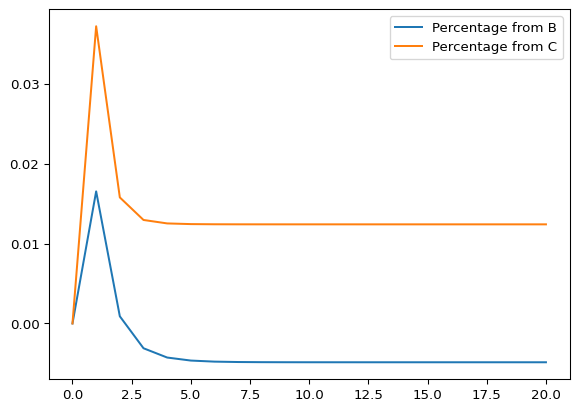

In [23]:
gains.plot(kind='line')

# *Ranking*

In [24]:
import sympy as sym
import numpy as np
import pandas as pd
import networkx as nx
sb = sym.Symbol
sm = sym.Matrix

In [25]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
G.add_edges_from([(1, 2), (7, 3), (2, 4), (4, 5), (3, 2), (5, 1), (6, 1), (3, 1), (7, 2), (2, 6), (3, 4), (7, 4)
                  , (5, 7), (6, 4), (3, 5), (5, 6), (7, 1), (5, 2), (7, 6), (1, 4), (6, 3)])

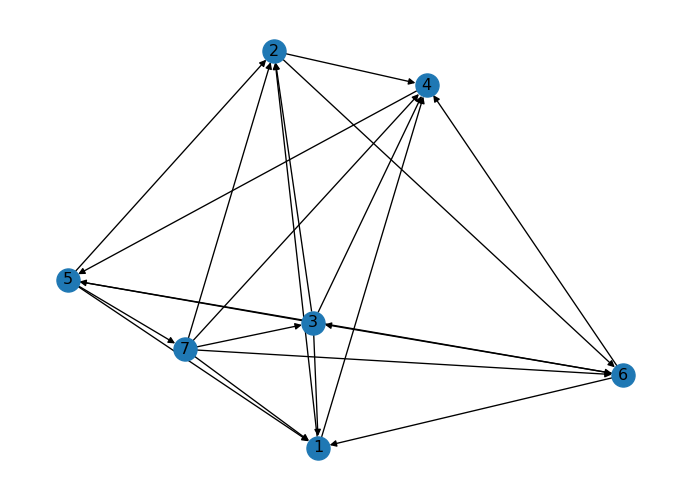

In [26]:
nx.draw(G, with_labels=True)

#### *adjacency matrix*

In [27]:
adj_mat = nx.to_numpy_array(G)
adj_mat

array([[0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 1., 0.]])

#### *win-loss record*

In [28]:
wins = adj_mat.sum(axis=1)
wins

array([2., 2., 4., 1., 4., 3., 5.])

In [29]:
losses = adj_mat.sum(axis=0)
losses

array([4., 4., 2., 5., 2., 3., 1.])

In [30]:
team = pd.DataFrame({'wins': wins, 'losses': losses}, index=range(1, 8))
team.sort_values(['wins', 'losses'], ascending=[False, True])

#### *Vertex Power*

In [31]:
power_rank = (adj_mat + adj_mat**2).sum(axis=1)
pd.Series(power_rank, index=range(1, 8)).sort_values(ascending=False)

7    10.0
3     8.0
5     8.0
6     6.0
1     4.0
2     4.0
4     2.0
dtype: float64

#### *Reverse PageRank*

In [32]:
col_sums = adj_mat.sum(axis=0)
P = np.zeros(adj_mat.shape)
for i in range(adj_mat.shape[0]):
    P[i, :] = adj_mat[i, :] / col_sums
pd.DataFrame(P)

In [33]:
alpha = 0.85
v = sym.ones(adj_mat.shape[0])[:, 0] / adj_mat.shape[0]
v

In [34]:
pg_mat = (sym.eye(P.shape[0]) - alpha * P)
pg_mat

In [35]:
pd.Series(list(pg_mat.gauss_jordan_solve(v* (1-alpha))[0]), index=range(1, 8))

1    0.0596673237707704
2    0.0796658079275577
3     0.176269636041093
4     0.125351577397605
5     0.244524719927139
6     0.130332241204918
7     0.184188693730917
dtype: object

#### *Weighted graph power ranking*

In [36]:
Gw = nx.DiGraph()
Gw.add_nodes_from([1, 2, 3, 4, 5, 6, 7])
Gw.add_weighted_edges_from([(1, 2, 4), (7, 3, 8), (2, 4, 7), (4, 5, 3), (3, 2, 7), (5, 1, 7), (6, 1, 23)
                            , (3, 1, 15), (7, 2, 6), (2, 6, 18), (3, 4, 13), (7, 4, 14)
                  , (5, 7, 7), (6, 4, 13), (3, 5, 7), (5, 6, 18), (7, 1, 45), (5, 2, 10), (7, 6, 19), (1, 4, 13), (6, 3, 13)])
adj_matw = nx.to_numpy_array(Gw)
adj_matw

array([[ 0.,  4.,  0., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  7.,  0., 18.,  0.],
       [15.,  7.,  0., 13.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  0.,  0.],
       [ 7., 10.,  0.,  0.,  0., 18.,  7.],
       [23.,  0., 13., 13.,  0.,  0.,  0.],
       [45.,  6.,  8., 14.,  0., 19.,  0.]])

In [37]:
pd.Series((adj_matw + adj_matw**2).sum(axis=1), index=range(1, 8))

1     202.0
2     398.0
3     534.0
4      12.0
5     564.0
6     916.0
7    2774.0
dtype: float64